In [1]:
import pandas as pd

In [2]:
%matplotlib inline

#Linear regression

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [16]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [17]:
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [18]:
diabetes_X = pd.DataFrame(diabetes['data'])
diabetes_y = diabetes['target']

In [19]:
diabetes_X.drop([1],axis=1,inplace=True)

In [20]:
diabetes_X.head()

,0,2,3,4,5,6,7,8,9
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [21]:
diabetes_X.isnull().sum()

0    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [22]:
list(diabetes_X)


[0, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
diabetes_X.columns = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


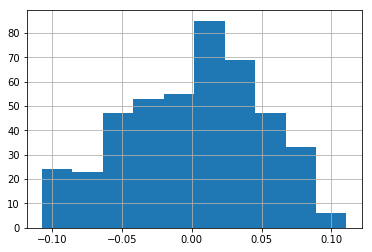

In [24]:
diabetes_X.age.hist()

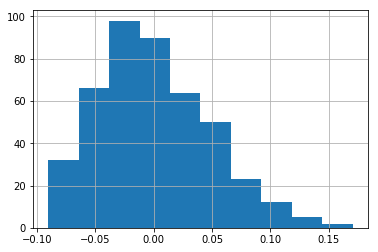

In [13]:
diabetes_X.bmi.hist()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X,diabetes_y,test_size = 0.33,random_state=42)

In [26]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [27]:
regr.coef_

array([   1.55272293,  601.2642954 ,  366.06803865, -631.03253486,
        361.72488543,   12.48969252,   56.94104356,  641.50821041,
        -32.35607129])

In [28]:
regr.intercept_

150.37338962751028

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [   1.55272293  601.2642954   366.06803865 -631.03253486  361.72488543
   12.48969252   56.94104356  641.50821041  -32.35607129]
Mean squared error: 2920.45
R squared: 0.49


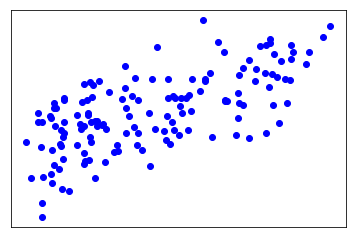

In [30]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R squared: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_test-y_pred,  color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [31]:
from sklearn.feature_selection import f_regression

In [32]:
f_test = f_regression(X_train,y_train)

In [33]:
f_test

(array([   9.22693543,  162.31476019,   73.89695736,    8.80026707,
           5.95364229,   52.1099041 ,   57.7483683 ,  103.03080805,
          39.76729902]),
 array([  2.59878613e-03,   6.67429748e-30,   4.96134324e-16,
          3.25909017e-03,   1.52776573e-02,   4.50008647e-12,
          4.01336363e-13,   5.97219087e-21,   1.04696494e-09]))

## Logistic Regression

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
clf = SGDClassifier(loss='log',penalty='l1',n_iter=5,eta0=0.001,learning_rate='constant')

In [36]:
clf.fit(X_train,y_train)

C:\Users\laxmisrini\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=5,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [37]:
preds = clf.predict(X_test)
type(preds)

numpy.ndarray

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
confusion_matrix(y_test,preds)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
clf.coef_

array([[-0.00069012, -0.00100294, -0.00056555, ..., -0.00017192,
        -0.00056527, -0.00115269],
       [-0.00060076, -0.00100577, -0.00092787, ..., -0.00017479,
        -0.00079301, -0.0013077 ],
       [-0.00055887, -0.00125463, -0.00093247, ..., -0.00055517,
        -0.00113241, -0.000942  ],
       ..., 
       [-0.0004426 , -0.00039924, -0.00020735, ...,  0.        ,
        -0.00032629, -0.0006592 ],
       [-0.0004104 , -0.00033051, -0.00046551, ...,  0.00028737,
        -0.00045189, -0.00087322],
       [-0.00082924, -0.00014846, -0.00082268, ...,  0.        ,
        -0.00031528, -0.00092931]])

In [41]:
clf.intercept_

array([-0.61621395, -0.61620344, -0.61191667, -0.61630803, -0.61194702,
       -0.61620752, -0.61618171, -0.61620519, -0.61207074, -0.61618912,
       -0.60765505, -0.61624603, -0.6120336 , -0.61622903, -0.60777181,
       -0.61620346, -0.60361446, -0.6161818 , -0.61619863, -0.60785704,
       -0.61624354, -0.61622141, -0.61189103, -0.60778219, -0.61198199,
       -0.61619271, -0.6120582 , -0.6161865 , -0.61627305, -0.60772705,
       -0.61209611, -0.61627893, -0.61196176, -0.61197063, -0.60780553,
       -0.60779219, -0.61624949, -0.61626683, -0.61190817, -0.6078693 ,
       -0.61207914, -0.60358753, -0.61626943, -0.61621001, -0.60775028,
       -0.61624473, -0.61621128, -0.60772514, -0.6119697 , -0.6162324 ,
       -0.6162001 , -0.61620353, -0.61205182, -0.61198842, -0.61625303,
       -0.61627718, -0.61631198, -0.61625014, -0.61202665, -0.60781895,
       -0.6162418 , -0.60355788, -0.61624548, -0.61204999, -0.61196666,
       -0.61618138, -0.61195663, -0.61193883, -0.61204679, -0.61

## Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
clust = KMeans(n_clusters=5)

In [47]:
clust.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
###clust.cluster.centers_

In [48]:
centers = pd.DataFrame(clust.cluster_centers_)

In [49]:
centers.columns = X_train.columns.values

In [50]:
centers

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.002495,-0.005394,-0.013197,-0.016776,-0.007111,-0.015932,-0.000249,-0.005974,-0.005919
1,0.012778,-0.015483,0.002650,0.011797,-0.005038,0.068692,-0.042847,-0.023949,-0.012468
2,0.018231,0.016009,0.006975,0.067815,0.068483,-0.022606,0.058629,0.040999,0.020707
3,0.020700,0.053828,0.047445,0.000449,-0.003746,-0.030086,0.023515,0.037242,0.041862
4,-0.048883,-0.046701,-0.041036,-0.056804,-0.051820,0.010546,-0.042965,-0.048183,-0.039371


In [55]:
X_train

,age,bmi,bp,s1,s2,s3,s4,s5,s6
231,0.009016,-0.030996,0.021872,0.008063,0.008707,0.004460,-0.002592,0.009436,0.011349
325,-0.001882,0.054152,-0.066495,0.072732,0.056619,-0.043401,0.084863,0.084495,0.048628
193,0.009016,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633
109,0.038076,-0.009439,0.002363,0.001183,0.037517,-0.054446,0.050176,-0.025952,0.106617
195,0.027178,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007837,0.023775
145,-0.041840,0.128521,0.063187,-0.033216,-0.032629,0.011824,-0.039493,-0.015998,-0.050783
210,0.009016,0.014272,0.014987,0.054845,0.047224,0.070730,-0.039493,-0.033249,-0.059067
152,-0.034575,-0.000817,0.070073,0.039710,0.066952,-0.065491,0.108111,0.026714,0.073480
294,0.023546,-0.030996,-0.005671,-0.016704,0.017788,-0.032356,-0.002592,-0.074089,-0.034215
180,-0.038207,0.004572,0.035644,-0.011201,0.005889,-0.047082,0.034309,0.016305,-0.001078


In [56]:
y_train

array([ 154.,  192.,  116.,   81.,  122.,  259.,  191.,  292.,   55.,
        107.,  210.,   91.,  253.,   85.,  252.,   59.,   78.,  200.,
         78.,  245.,  175.,   42.,  127.,   53.,   94.,  104.,  199.,
        265.,  281.,  248.,  257.,  215.,  303.,  170.,   59.,  277.,
        209.,  138.,  198.,  124.,   96.,  288.,  225.,  265.,  101.,
         55.,  198.,   51.,  252.,   64.,  220.,  131.,  212.,  142.,
        103.,  155.,  121.,   86.,  111.,   65.,  131.,   51.,  128.,
        141.,   48.,  109.,  178.,   88.,   84.,  216.,  150.,   60.,
         96.,  190.,   74.,  279.,  182.,  160.,  245.,  276.,  174.,
        180.,  150.,  196.,  138.,   97.,  246.,  321.,  308.,  109.,
         69.,  182.,  258.,  161.,  178.,  214.,   45.,  150.,  160.,
         55.,  197.,  185.,  268.,  310.,  123.,   68.,   72.,  185.,
        144.,  147.,  168.,  178.,  246.,  151.,  127.,   83.,  332.,
        152.,  109.,   90.,   66.,  214.,   85.,  129.,   89.,  259.,
        229.,  200.,

In [58]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
kf.get_n_splits(X_train)

4

In [59]:
for train_index,test_index in kf.split(X_train):
    print(train_index,test_index)

[ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 